# Exercises in Data Transformation and Exploratory Data Analysis

This notebook contains the exercises for the class of February 5, 2025, in the course Data & Things at Roskilde University.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 1

Plot the number of Cinemas in Danmark over the years. The next cell loads in the needed data for you if you have the file "DK_cinemas.csv" in the same folder as this notebook. 

In [2]:
cinema_data = pd.read_csv('DK_cinemas.csv', sep=";")
years = cinema_data["Year"].tolist()
cinemas = cinema_data["Cinemas"].tolist()

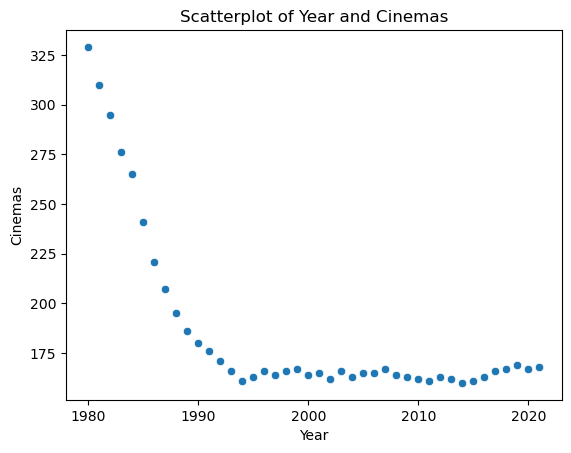

In [3]:
sns.scatterplot(data = cinema_data, x = "Year", y = "Cinemas")
plt.title("Scatterplot of Year and Cinemas")
plt.show()

## Exercise 2

In this exercise, we are going to use the `penguins` dataset from the Seaborn package. The cell below loads the data

In [4]:
penguins_data = sns.load_dataset("penguins")

In [5]:
penguins_data ##Own code

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Based on the `Penguins` dataset, answer the following questions:

1. Make a barplot that shows how many penguins there are of each species in the dataset. Support the plot by calculating the numbers.
2. Make a barplot that shows the average body mass for each species of penguin. Support the plot by calculating the numbers
3. Make a boxplots that shows the distribution of the body mass for each species of penguin. Support the plot by calculating the numbers.
4. Make a scatterplot that shows the correlation between body mass (in g) and flipper length (in mm). Support the plot by calculating the numbers.
5. Use boxplots and histograms to show how bill length, bill depth, flipper length and body mass varies between species and sex.
6. Visualise how the linear correlation between body mass and flipper length varies between species and sex.

#### 1. Make a barplot that shows how many penguins there are of each species in the dataset. Support the plot by calculating the numbers.

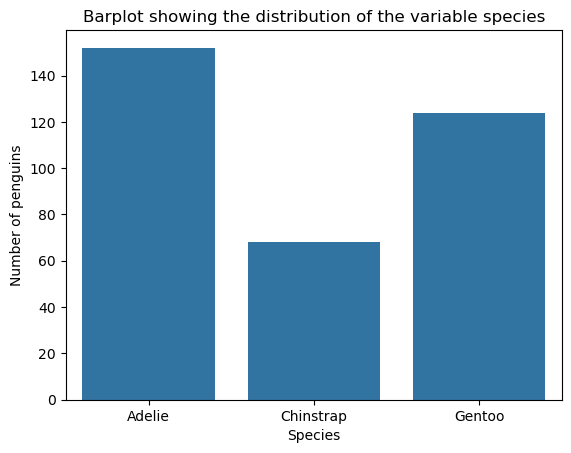

In [6]:
sns.countplot(x = "species", data = penguins_data)
plt.title("Barplot showing the distribution of the variable species")
plt.xlabel("Species")
plt.ylabel("Number of penguins")
plt.show()

In [7]:
penguins_data["species"].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

#### 2. Make a barplot that shows the average body mass for each species of penguin. Support the plot by calculating the numbers

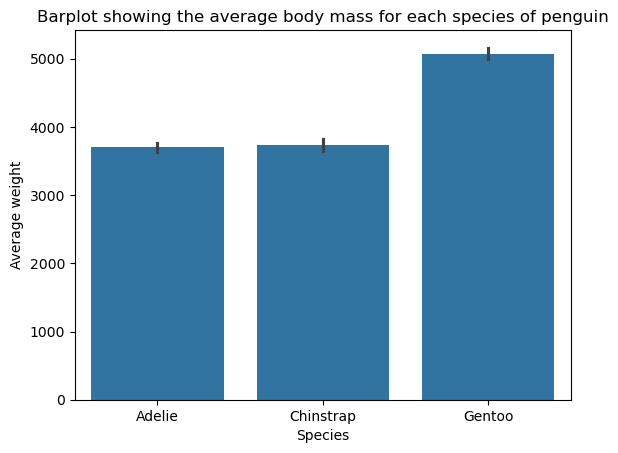

In [8]:
sns.barplot(data=penguins_data, x="species", y="body_mass_g") ##Using default estimator,  
plt.title("Barplot showing the average body mass for each species of penguin")
plt.xlabel("Species")
plt.ylabel("Average weight")
plt.show()

In [9]:
grouped_data = penguins_data[["species", "body_mass_g"]].groupby("species");
grouped_data.mean()

,body_mass_g
species,
Adelie,3700.662252
Chinstrap,3733.088235
Gentoo,5076.016260


#### 3. Make a boxplots that shows the distribution of the body mass for each species of penguin. Support the plot by calculating the numbers.

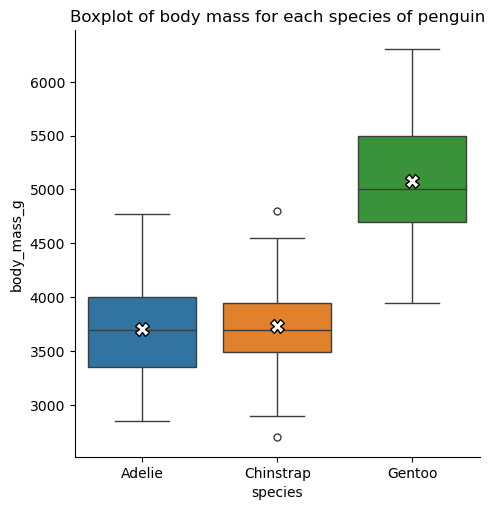

In [10]:
sns.catplot(x="species", y = "body_mass_g", hue = "species", data = penguins_data, kind="box",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Boxplot of body mass for each species of penguin")
plt.show()

In [11]:
weight_by_species = penguins_data["body_mass_g"].groupby(penguins_data["species"]).describe()
weight_by_species["median"] = penguins_data["body_mass_g"].groupby(penguins_data["species"]).median()
weight_by_species

,count,mean,std,min,25%,50%,75%,max,median
species,,,,,,,,,
Adelie,151.0,3700.662252,458.566126,2850.0,3350.0,3700.0,4000.0,4775.0,3700.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0,3700.0
Gentoo,123.0,5076.016260,504.116237,3950.0,4700.0,5000.0,5500.0,6300.0,5000.0


#### 4. Make a scatterplot that shows the correlation between body mass (in g) and flipper length (in mm). Support the plot by calculating the numbers.

Text(0, 0.5, 'Flipper length (in mm)')

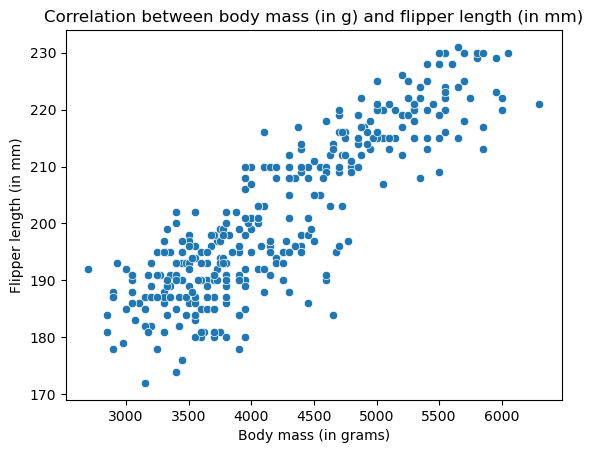

In [12]:
sns.scatterplot(data = penguins_data, x = "body_mass_g", y = "flipper_length_mm")

plt.title("Correlation between body mass (in g) and flipper length (in mm)")
plt.xlabel("Body mass (in grams)")
plt.ylabel("Flipper length (in mm)")

In [13]:
penguins_data["body_mass_g"].corr(penguins_data["flipper_length_mm"])

np.float64(0.8712017673060114)

#### 5. Use boxplots and histograms to show how bill length, bill depth, flipper length and body mass varies between species and sex.

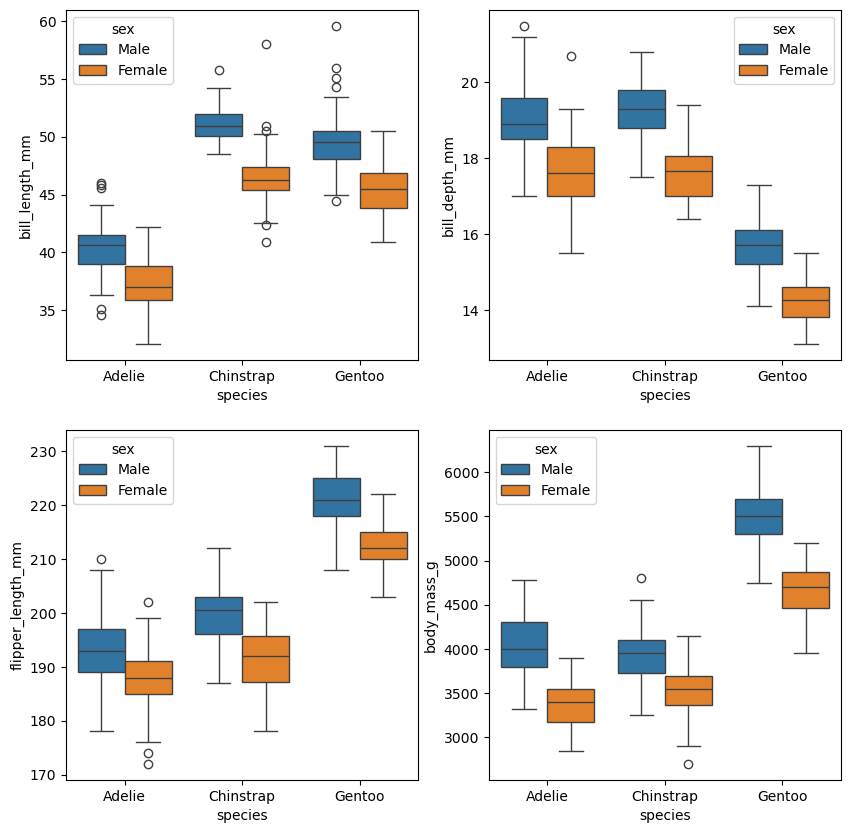

In [14]:
features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten() ## flattens axis array, from 2d to 1D. So it can be used in loop
for i, feature in enumerate(features): ##Enumerate gives both "feature" and its index
    sns.boxplot(data = penguins_data, x = "species", y = feature, hue = "sex", ax=axes[i])


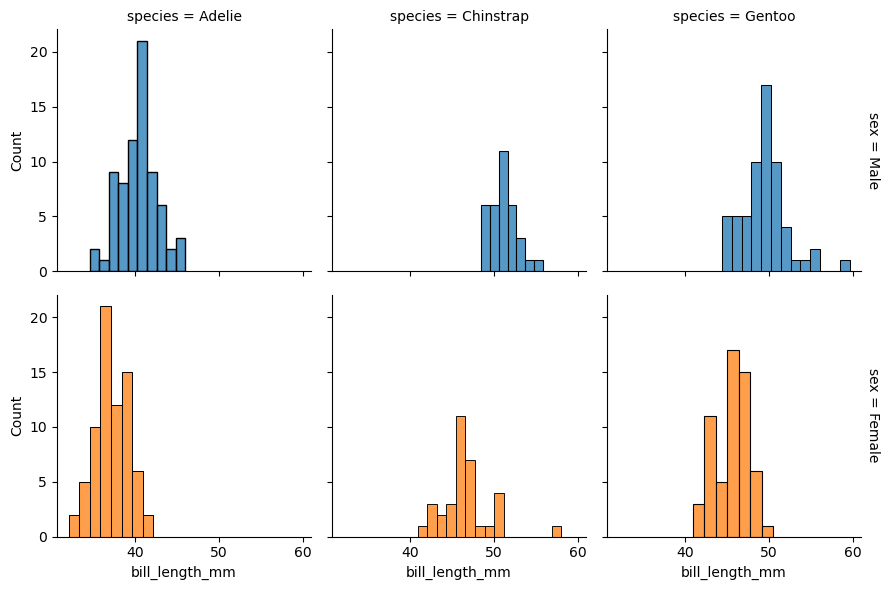

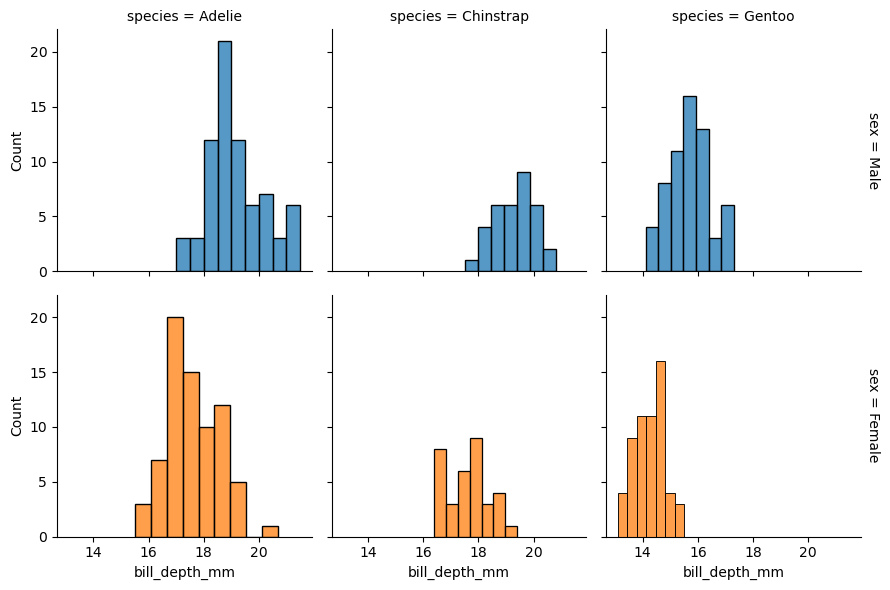

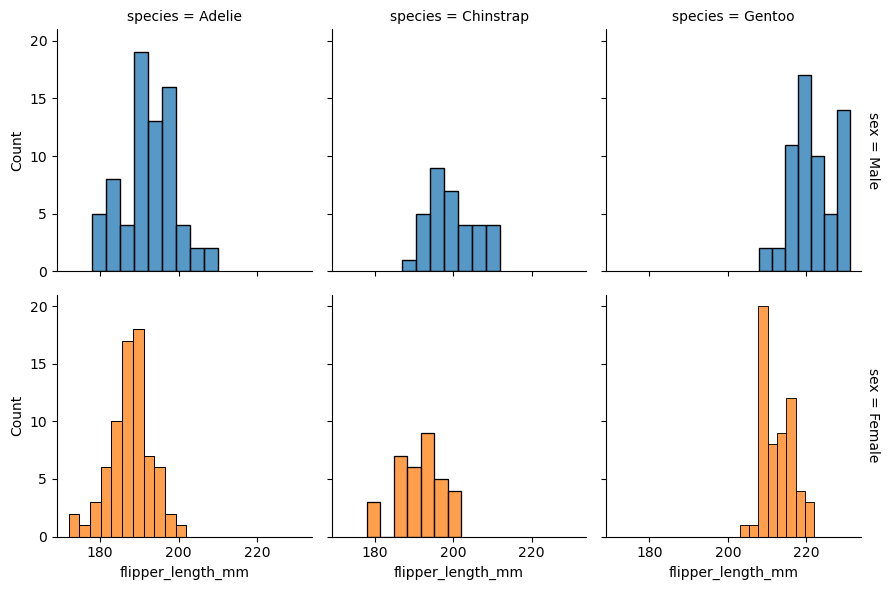

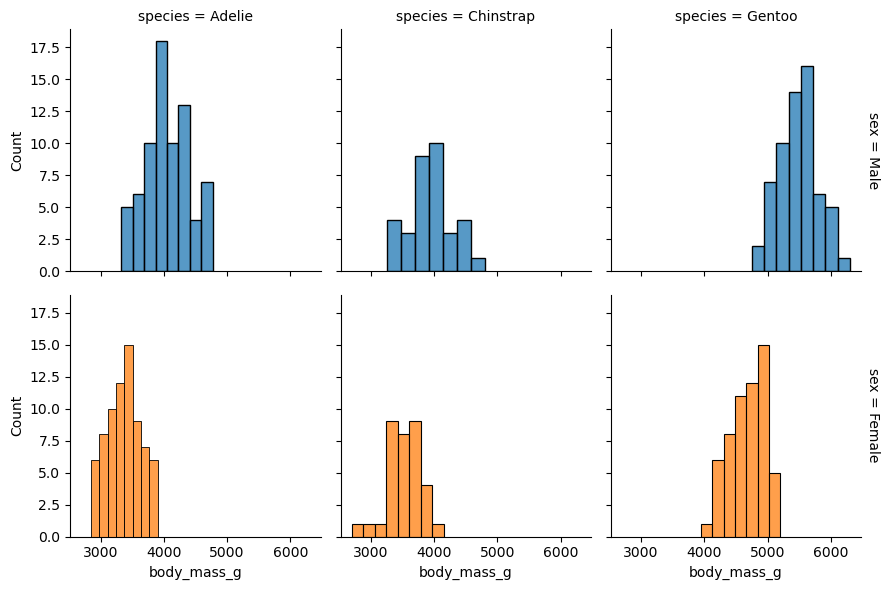

In [15]:
features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]


for f in features:
    g = sns.FacetGrid(penguins_data, col="species", row="sex", hue = "sex", margin_titles=True) ##Margin titles add sex to right side
    g.map_dataframe(sns.histplot, x=f)
plt.show()


#### 6. Visualise how the linear correlation between body mass and flipper length varies between species and sex.

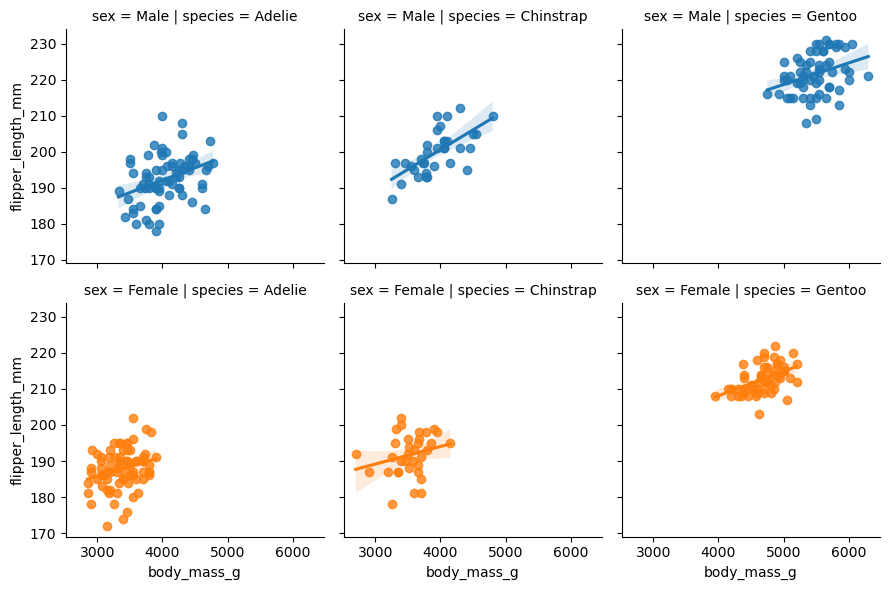

In [16]:
g = sns.FacetGrid(penguins_data, col="species", row="sex", hue = "sex") ##Margin titles add sex to right side
g.map_dataframe(sns.regplot, x="body_mass_g", y="flipper_length_mm")
plt.show()

## Exercise 3 -- Select and compare variables, both numerical, categorical and combination of both

Do an exploratory data analysis of the adult dataset. The cell below loads the dataset from UCI Machine Learning Repository into a pandas dataframe called `adult_data`. It requires that you have installed the package `ucimlrepo`. (Otherwise the dataset is on model for this class.)

## Initial step (overview of data):

In [17]:
from ucimlrepo import fetch_ucirepo 
adult = fetch_ucirepo(id=2) 
X = adult.data.features 
y = adult.data.targets 
X["income"] = y
adult_data = X.copy()

adult_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


Below we see the first 5 rows from the adult dataset. The dataset consists of information about individuals, such as their age, sex, working hours pr week, marital-status, income etc.

In [18]:
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Pandas .info() provides us with an overview of the variables in the dataset, along with their Dtype. We see that there are 15 columns, and a total of 48842 entries. 
The types are int64 and object (string). It is worthwhile to notice, that although education-num is int64, it is a categorical value. 

In [19]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Using Pandas .Describe() we get a statistically summarization of each numerical column in the dataframe (excluding null values). It provides us with an convenient overview of each respective variables mean value, the standard deviation, the quartiles (including the 50% quartile, in other words the median), the min&max values and the count.  

In [20]:
adult_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


We see that our dataset has null values in the columns: workclass, occupation and native-country:

In [21]:
adult_data.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

Looking at the number of unique values for each column, an interesting observation occours. The income variable consist of 4 unique values, but is expected to be binary (is the person earning more or less than 50k).

In [22]:
adult_data.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

Looking further into the details it becomes apparent, that we should unify the income variable

In [23]:
adult_data["income"].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

Unifying the income variable:

In [24]:
adult_data["income"] = adult_data["income"].replace({"<=50K." : "<=50K", ">50K.": ">50K"})

In [25]:
adult_data["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

## Variation and distribution within the respective variables: 

#### Age:

The age variable is right skewed and it tells us that the mean is greater than the median

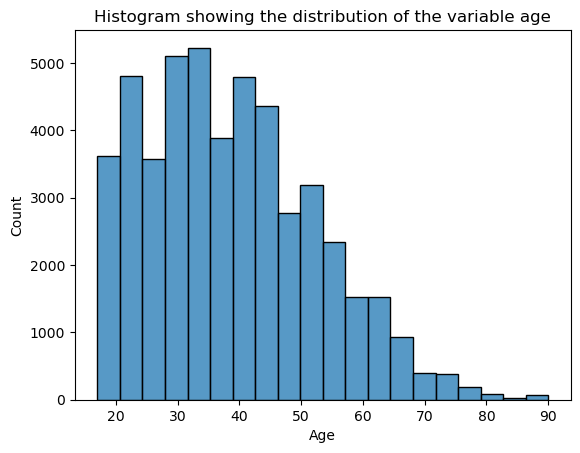

In [26]:
sns.histplot(data = adult_data, x = "age", bins = 20)
plt.title("Histogram showing the distribution of the variable age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Plotting a boxplot also shows us, how the mean is greater than the median (Q2, 50%). As the variable is right skewed, the median line in the boxplot is closer to the buttom of the box (First quantile, Q1, 25%). It would instead be closer to the top(Third quantile, Q3, 75%) if it had been left skewed (and in the middle if normally distributed).

The interquartile range (IQR) = Q3-Q1, represents the middle 50% of the data

The whiskers extends to 1.5 * IQR, and sets the boundary for where datapoints are to be considered outliers
Buttom whisker: max(min(data values), Q1-1.5*IQR) -- We take the max in this calculation, as we don't want to extend the whisker below the minimum data value.
Top whisker: min(max(data values), Q3+1.5*IQR

As seen by the top whisker, there are some outliers (people of age greater than approx. 76)

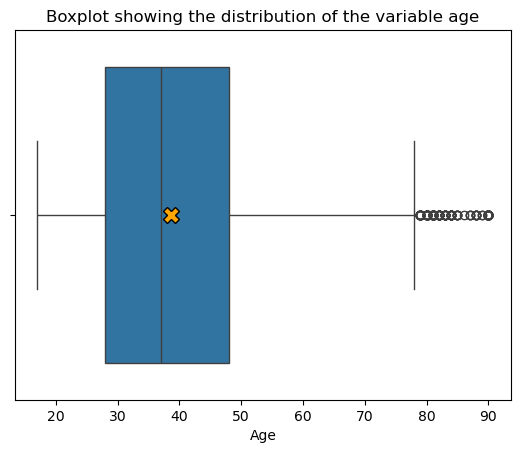

In [27]:
sns.boxplot(x=adult_data["age"], showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"orange", "markeredgecolor":"black", "markersize": "12"})
plt.title("Boxplot showing the distribution of the variable age")
plt.xlabel("Age")
plt.show()

Looking at the *variation* of age:

In [28]:
adult_data[["age"]].describe()

,age
count,48842.000000
mean,38.643585
std,13.710510
min,17.000000
25%,28.000000
50%,37.000000
75%,48.000000
max,90.000000


The standard deviation (std) tells us how far from the mean values, the variable is. In our case we can see that most of the ages are within 13.71 years from the mean of 38.64.

We also see that the mean is greater than the median, however not that much. This match our expectations from the histogram showing us that the data is right skewed but not to an extreme extend 

#### Workclass

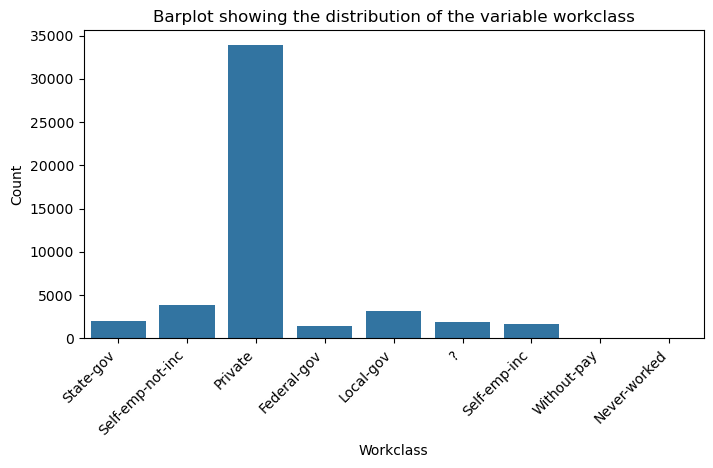

In [29]:
plt.figure(figsize=(8, 4))
sns.countplot(x = "workclass", data = adult_data)
plt.title("Barplot showing the distribution of the variable workclass")
plt.xlabel("Workclass")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

Looking at the distribution for workclass we see, that most people belong to the class "private". In other words we have an imbalanced distribution. We also see that there is a category "?", which we could consider changing to None, 0 etc. 

In [30]:
adult_data["workclass"].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

We see that 70.8% of people belong to the "private" workclass

In [31]:
adult_data["workclass"].value_counts(normalize=True)

workclass
Private             0.708160
Self-emp-not-inc    0.080662
Local-gov           0.065498
State-gov           0.041375
?                   0.038347
Self-emp-inc        0.035402
Federal-gov         0.029909
Without-pay         0.000439
Never-worked        0.000209
Name: proportion, dtype: float64

#### fnlwgt

It is right skewed!

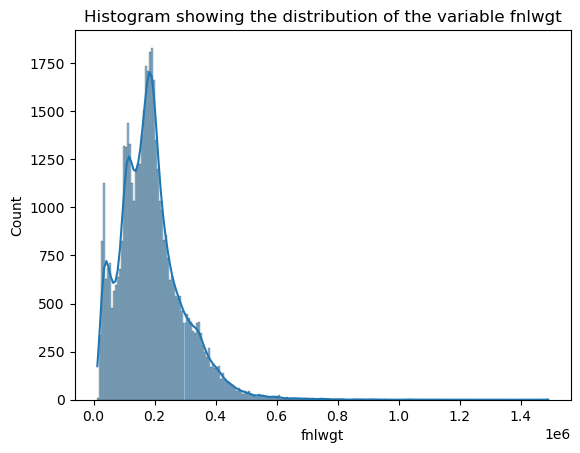

In [32]:
sns.histplot(data = adult_data, x = "fnlwgt", kde=True)
plt.title("Histogram showing the distribution of the variable fnlwgt")
plt.xlabel("fnlwgt")
plt.ylabel("Count")
plt.show()

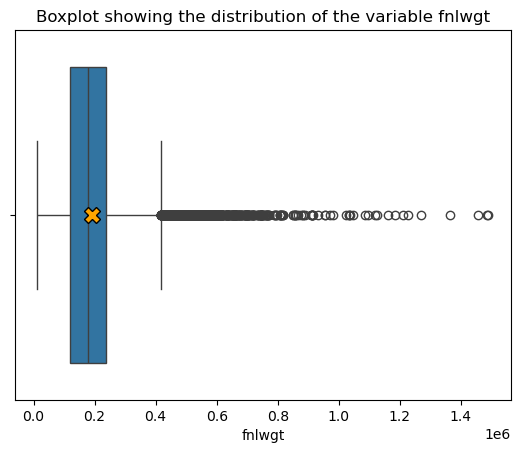

In [33]:
sns.boxplot(x=adult_data["fnlwgt"], showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"orange", "markeredgecolor":"black", "markersize": "12"})
plt.title("Boxplot showing the distribution of the variable fnlwgt")
plt.xlabel("fnlwgt")
plt.show()

In [34]:
adult_data[["fnlwgt"]].describe()

,fnlwgt
count,4.884200e+04
mean,1.896641e+05
std,1.056040e+05
min,1.228500e+04
25%,1.175505e+05
50%,1.781445e+05
75%,2.376420e+05
max,1.490400e+06


#### Education

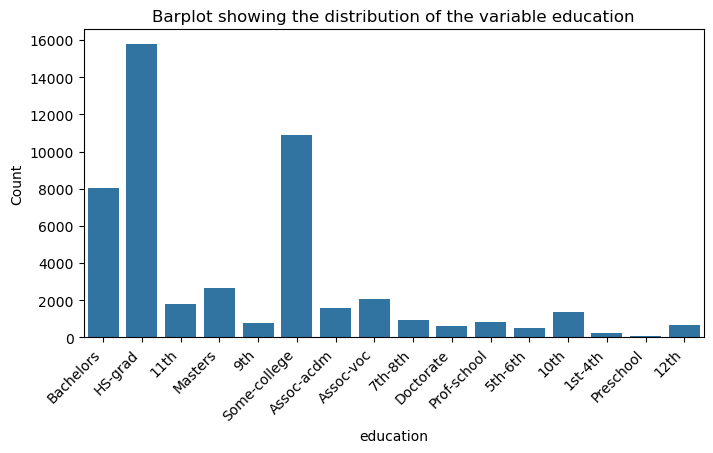

In [35]:
plt.figure(figsize=(8, 4))
sns.countplot(x = "education", data = adult_data)
plt.title("Barplot showing the distribution of the variable education")
plt.xlabel("education")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

In [36]:
adult_data["education"].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [37]:
adult_data["education"].value_counts(normalize=True)

education
HS-grad         0.323164
Some-college    0.222718
Bachelors       0.164305
Masters         0.054400
Assoc-voc       0.042197
11th            0.037099
Assoc-acdm      0.032779
10th            0.028439
7th-8th         0.019553
Prof-school     0.017075
9th             0.015478
12th            0.013452
Doctorate       0.012162
5th-6th         0.010421
1st-4th         0.005057
Preschool       0.001699
Name: proportion, dtype: float64

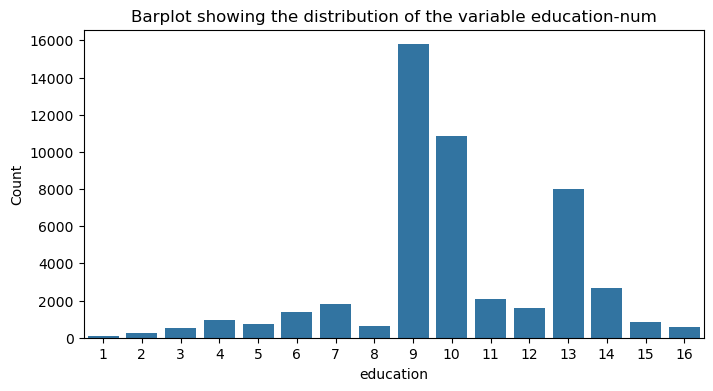

In [38]:
plt.figure(figsize=(8, 4))
sns.countplot(x = "education-num", data = adult_data)
plt.title("Barplot showing the distribution of the variable education-num")
plt.xlabel("education")
plt.ylabel("Count")
plt.show()

In [39]:
adult_data["education-num"].value_counts()

education-num
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: count, dtype: int64

In [40]:
adult_data["education-num"].value_counts(normalize=True)

education-num
9     0.323164
10    0.222718
13    0.164305
14    0.054400
11    0.042197
7     0.037099
12    0.032779
6     0.028439
4     0.019553
15    0.017075
5     0.015478
8     0.013452
16    0.012162
3     0.010421
2     0.005057
1     0.001699
Name: proportion, dtype: float64

#### Marital status

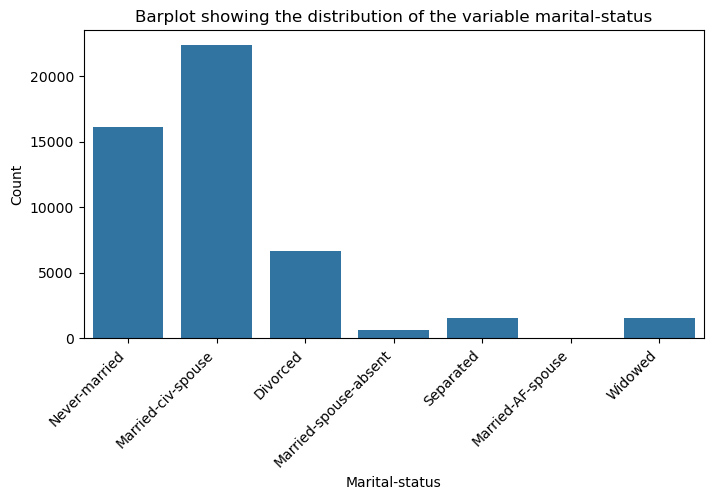

In [41]:
plt.figure(figsize=(8, 4))
sns.countplot(x = "marital-status", data = adult_data)
plt.title("Barplot showing the distribution of the variable marital-status")
plt.xlabel("Marital-status")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

In [42]:
adult_data["marital-status"].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [43]:
adult_data["marital-status"].value_counts(normalize=True)

marital-status
Married-civ-spouse       0.458192
Never-married            0.329982
Divorced                 0.135805
Separated                0.031325
Widowed                  0.031080
Married-spouse-absent    0.012858
Married-AF-spouse        0.000758
Name: proportion, dtype: float64

#### Occupation

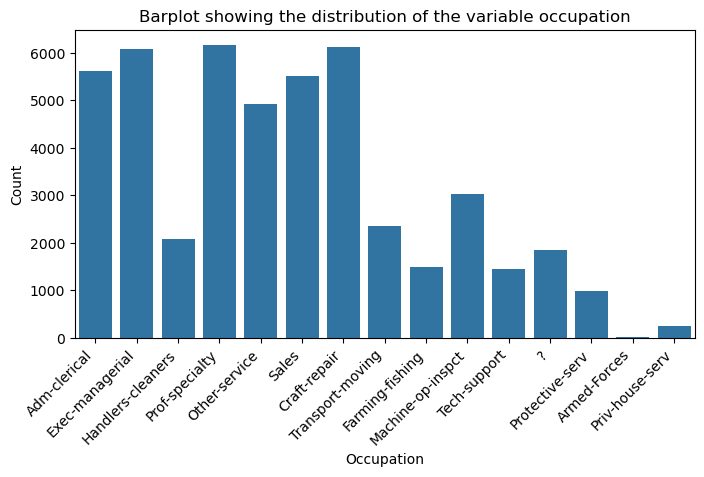

In [44]:
plt.figure(figsize=(8, 4))
sns.countplot(x = "occupation", data = adult_data)
plt.title("Barplot showing the distribution of the variable occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

In [45]:
adult_data["occupation"].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [46]:
adult_data["occupation"].value_counts(normalize=True)

occupation
Prof-specialty       0.128916
Craft-repair         0.127663
Exec-managerial      0.127120
Adm-clerical         0.117199
Sales                0.114964
Other-service        0.102828
Machine-op-inspct    0.063121
Transport-moving     0.049190
Handlers-cleaners    0.043278
?                    0.038495
Farming-fishing      0.031122
Tech-support         0.030203
Protective-serv      0.020532
Priv-house-serv      0.005055
Armed-Forces         0.000313
Name: proportion, dtype: float64

#### Relationship

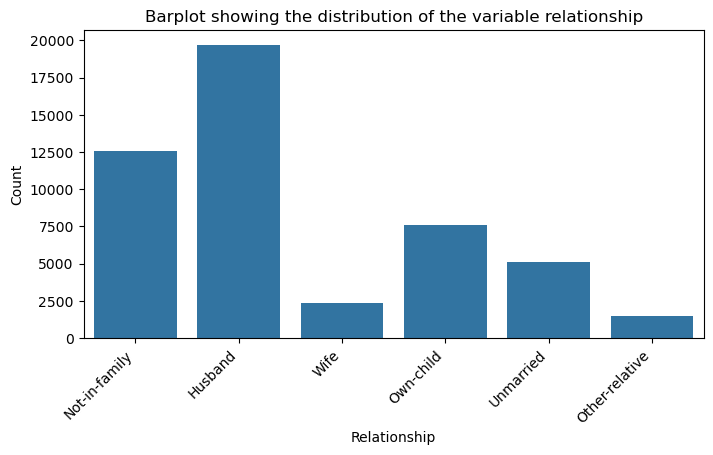

In [47]:
plt.figure(figsize=(8, 4))
sns.countplot(x = "relationship", data = adult_data)
plt.title("Barplot showing the distribution of the variable relationship")
plt.xlabel("Relationship")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

In [48]:
adult_data["relationship"].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [49]:
adult_data["relationship"].value_counts(normalize=True)

relationship
Husband           0.403669
Not-in-family     0.257627
Own-child         0.155215
Unmarried         0.104930
Wife              0.047725
Other-relative    0.030834
Name: proportion, dtype: float64

#### Race

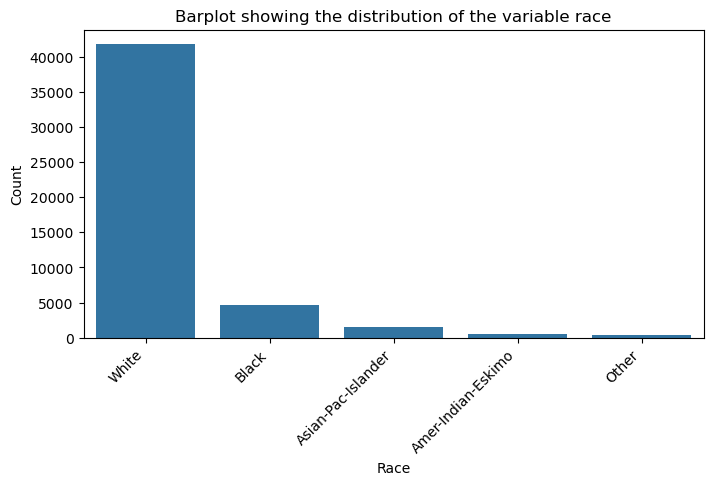

In [50]:
plt.figure(figsize=(8, 4))
sns.countplot(x = "race", data = adult_data)
plt.title("Barplot showing the distribution of the variable race")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

In [51]:
adult_data["race"].value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [52]:
adult_data["race"].value_counts(normalize=True)

race
White                 0.855043
Black                 0.095922
Asian-Pac-Islander    0.031100
Amer-Indian-Eskimo    0.009623
Other                 0.008313
Name: proportion, dtype: float64

#### Sex

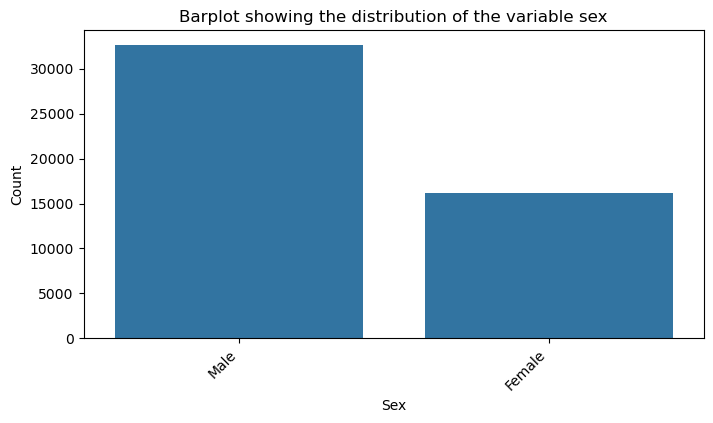

In [53]:
plt.figure(figsize=(8, 4))
sns.countplot(x = "sex", data = adult_data)
plt.title("Barplot showing the distribution of the variable sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

In [54]:
adult_data["sex"].value_counts()

sex
Male      32650
Female    16192
Name: count, dtype: int64

In [55]:
adult_data["sex"].value_counts(normalize=True)

sex
Male      0.668482
Female    0.331518
Name: proportion, dtype: float64

#### Capital-gain

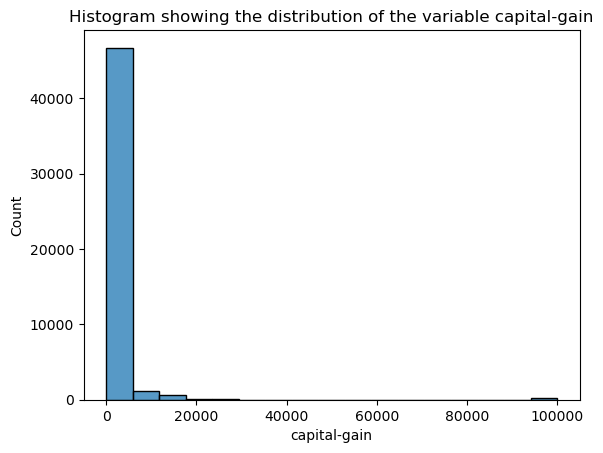

In [56]:
sns.histplot(data = adult_data, x = "capital-gain")
plt.title("Histogram showing the distribution of the variable capital-gain")
plt.xlabel("capital-gain")
plt.ylabel("Count")
plt.show()

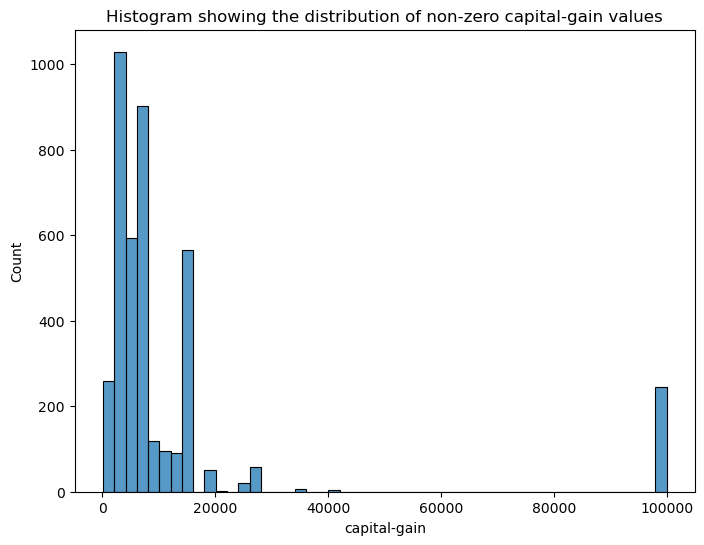

In [57]:
plt.figure(figsize=(8, 6))
sns.histplot(data=adult_data[adult_data["capital-gain"] > 0], x="capital-gain", bins=50)
plt.title("Histogram showing the distribution of non-zero capital-gain values")
plt.xlabel("capital-gain")
plt.ylabel("Count")
plt.show()


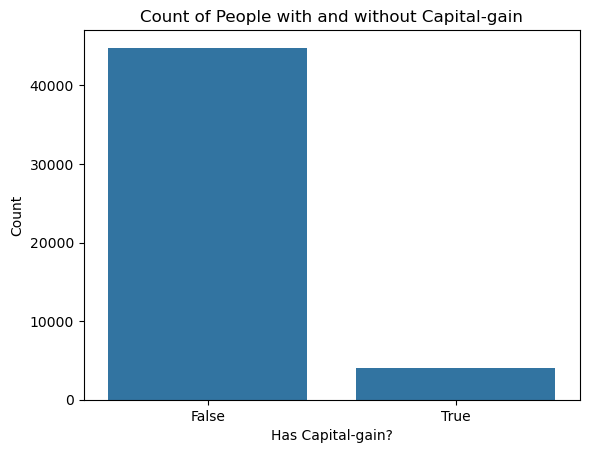

In [58]:
sns.countplot(x=adult_data["capital-gain"] > 0, data=adult_data)
plt.title("Count of People with and without Capital-gain")
plt.xlabel("Has Capital-gain?")
plt.ylabel("Count")
plt.show()


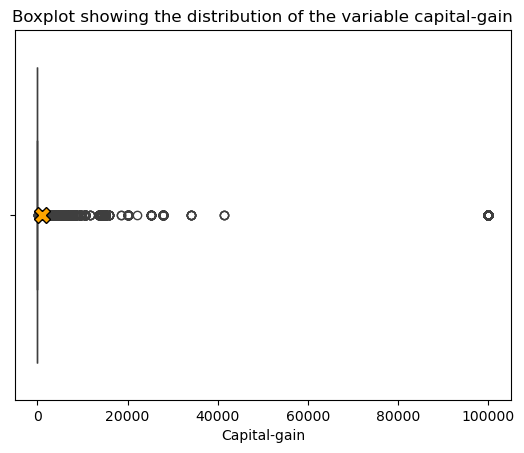

In [59]:
sns.boxplot(data = adult_data, x = "capital-gain",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"orange", "markeredgecolor":"black", "markersize": "12"})
plt.title("Boxplot showing the distribution of the variable capital-gain")
plt.xlabel("Capital-gain")
plt.show()

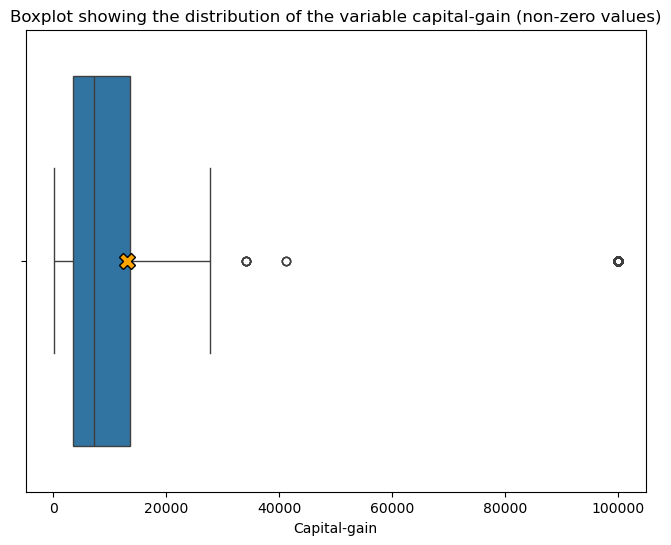

In [60]:
capital_gain_filtered = adult_data[adult_data["capital-gain"] > 0]

plt.figure(figsize=(8, 6))
sns.boxplot(data=capital_gain_filtered, x="capital-gain", showmeans=True,
            meanprops={"marker": "X", "markerfacecolor": "orange", "markeredgecolor": "black", "markersize": 12})

plt.title("Boxplot showing the distribution of the variable capital-gain (non-zero values)")
plt.xlabel("Capital-gain")

plt.show()


In [61]:
adult_data[["capital-gain"]].describe()

,capital-gain
count,48842.000000
mean,1079.067626
std,7452.019058
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,99999.000000


75% of people have capital gain of 0. The data is extremely right skewed. The mean is much greater than the median. We also have a high standard deviation, when compared to the mean. Said in other words: Most people don't have capital gain, and those that have tends to have very high capital gains

In [62]:
capital_gain_filtered.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,4035.000000,4.035000e+03,4035.000000,4035.000000,4035.0,4035.000000
mean,44.117720,1.870015e+05,11.064188,13061.665675,0.0,43.526146
std,13.370906,1.029421e+05,2.678916,22711.237412,0.0,12.466097
min,17.000000,1.930200e+04,1.000000,114.000000,0.0,1.000000
25%,35.000000,1.168110e+05,9.000000,3411.000000,0.0,40.000000
50%,43.000000,1.749950e+05,10.000000,7298.000000,0.0,40.000000
75%,52.000000,2.347725e+05,13.000000,13550.000000,0.0,50.000000
max,90.000000,1.033222e+06,16.000000,99999.000000,0.0,99.000000


#### Capital-loss

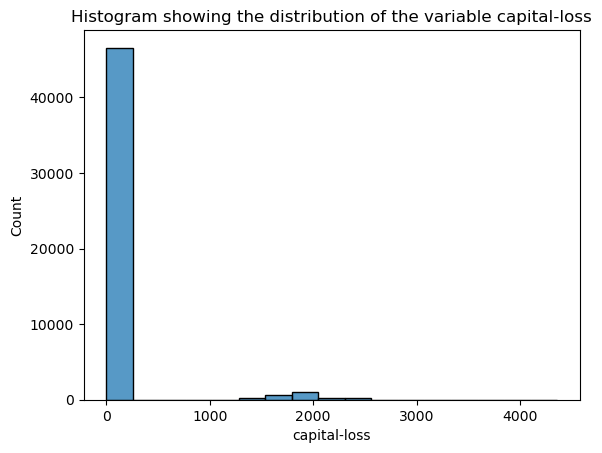

In [63]:
sns.histplot(data = adult_data, x = "capital-loss")
plt.title("Histogram showing the distribution of the variable capital-loss")
plt.xlabel("capital-loss")
plt.ylabel("Count")
plt.show()

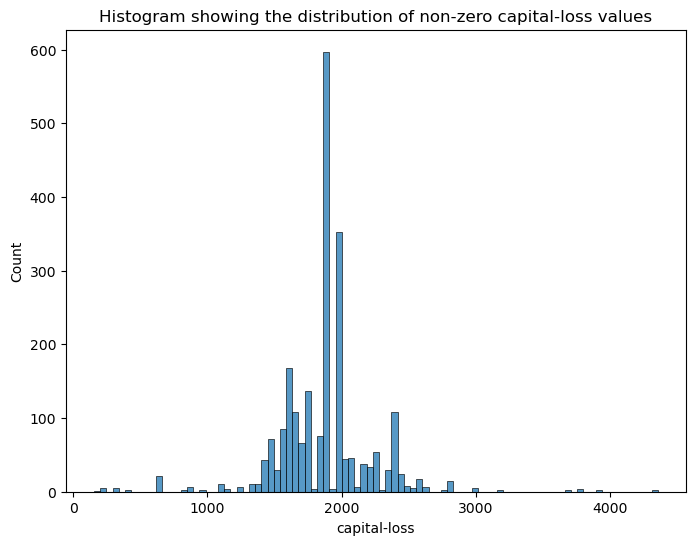

In [64]:
plt.figure(figsize=(8, 6))
sns.histplot(data=adult_data[adult_data["capital-loss"] > 0], x="capital-loss")
plt.title("Histogram showing the distribution of non-zero capital-loss values")
plt.xlabel("capital-loss")
plt.ylabel("Count")
plt.show()


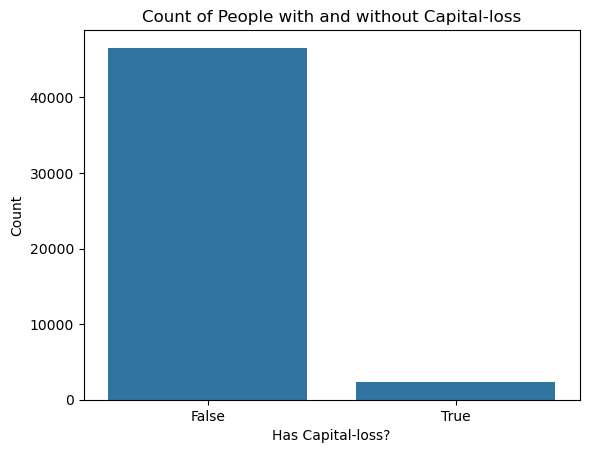

In [65]:
sns.countplot(x=adult_data["capital-loss"] > 0, data=adult_data)
plt.title("Count of People with and without Capital-loss")
plt.xlabel("Has Capital-loss?")
plt.ylabel("Count")
plt.show()


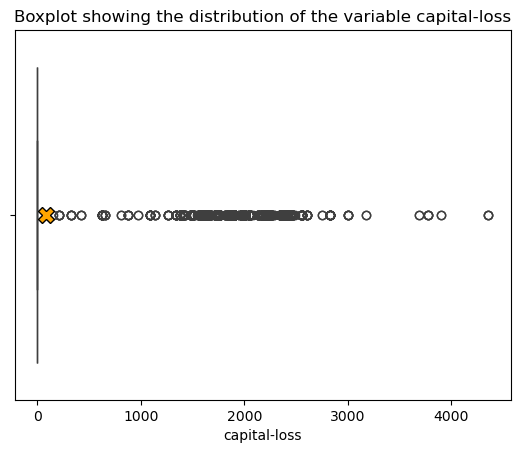

In [66]:
sns.boxplot(data = adult_data, x = "capital-loss",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"orange", "markeredgecolor":"black", "markersize": "12"})
plt.title("Boxplot showing the distribution of the variable capital-loss")
plt.xlabel("capital-loss")
plt.show()

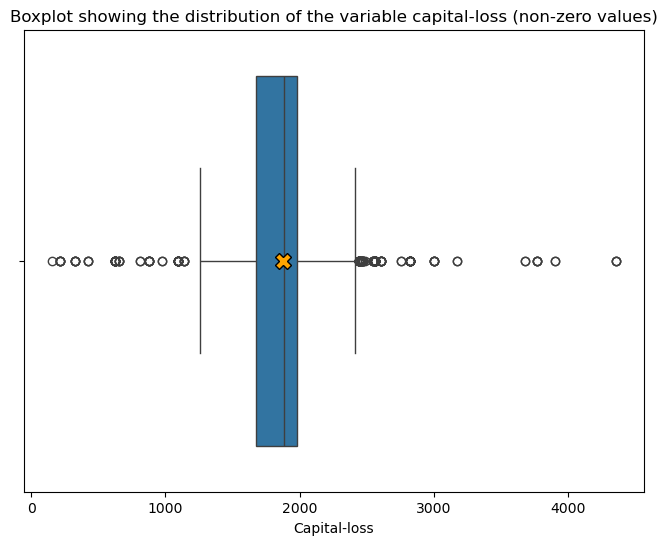

In [67]:
capital_loss_filtered = adult_data[adult_data["capital-loss"] > 0]

plt.figure(figsize=(8, 6))
sns.boxplot(data=capital_loss_filtered, x="capital-loss", showmeans=True,
            meanprops={"marker": "X", "markerfacecolor": "orange", "markeredgecolor": "black", "markersize": 12})

plt.title("Boxplot showing the distribution of the variable capital-loss (non-zero values)")
plt.xlabel("Capital-loss")

plt.show()


In [68]:
adult_data["capital-loss"].describe()

count    48842.000000
mean        87.502314
std        403.004552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

In [69]:
capital_loss_filtered.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,2282.000000,2282.00000,2282.000000,2282.0,2282.000000,2282.000000
mean,41.795355,188025.65206,10.979842,0.0,1872.825592,43.274759
std,12.866690,98913.11462,2.644100,0.0,364.048529,12.032448
min,17.000000,20953.00000,1.000000,0.0,155.000000,1.000000
25%,32.000000,120880.75000,9.000000,0.0,1672.000000,40.000000
50%,41.000000,176862.50000,10.000000,0.0,1887.000000,40.000000
75%,50.000000,233208.75000,13.000000,0.0,1977.000000,50.000000
max,90.000000,816750.00000,16.000000,0.0,4356.000000,99.000000


#### Hours-pr-week

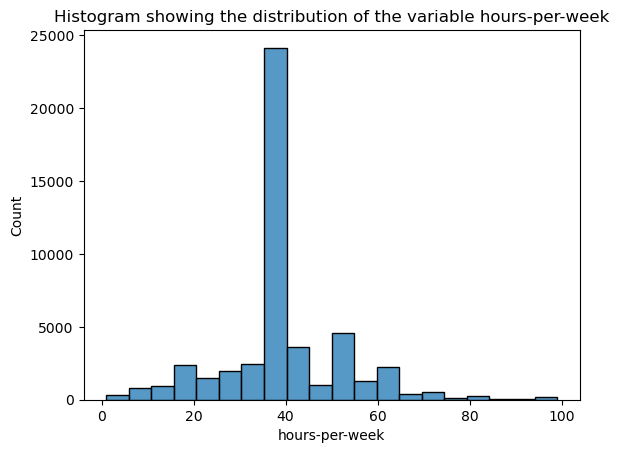

In [70]:
sns.histplot(data = adult_data, x = "hours-per-week", bins=20)
plt.title("Histogram showing the distribution of the variable hours-per-week")
plt.xlabel("hours-per-week")
plt.ylabel("Count")
plt.show()

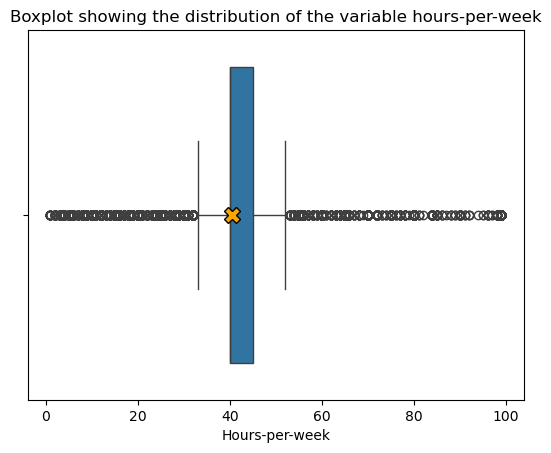

In [71]:
sns.boxplot(data = adult_data, x = "hours-per-week",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"orange", "markeredgecolor":"black", "markersize": "12"})
plt.title("Boxplot showing the distribution of the variable hours-per-week")
plt.xlabel("Hours-per-week")
plt.show()

In [72]:
adult_data[["hours-per-week"]].describe()

,hours-per-week
count,48842.000000
mean,40.422382
std,12.391444
min,1.000000
25%,40.000000
50%,40.000000
75%,45.000000
max,99.000000


#### Native-country

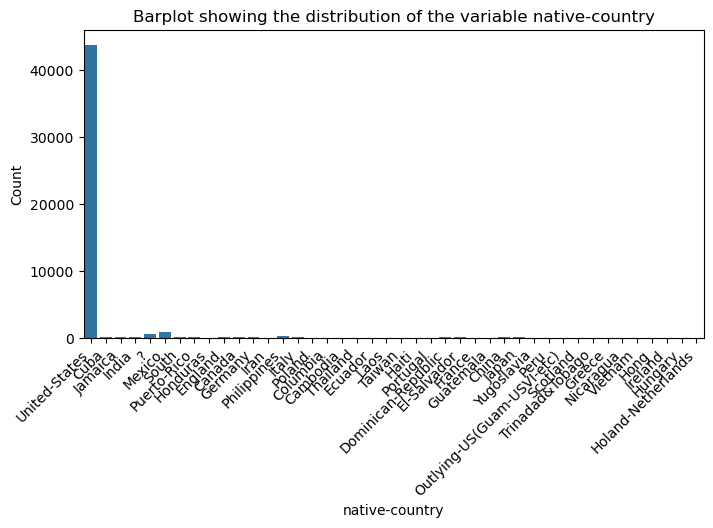

In [73]:
plt.figure(figsize=(8, 4))
sns.countplot(x = "native-country", data = adult_data)
plt.title("Barplot showing the distribution of the variable native-country")
plt.xlabel("native-country")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

In [74]:
adult_data["native-country"].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [75]:
adult_data["native-country"].value_counts(normalize=True)

native-country
United-States                 0.902487
Mexico                        0.019581
?                             0.012004
Philippines                   0.006074
Germany                       0.004241
Puerto-Rico                   0.003789
Canada                        0.003747
El-Salvador                   0.003191
India                         0.003109
Cuba                          0.002841
England                       0.002615
China                         0.002512
South                         0.002368
Jamaica                       0.002183
Italy                         0.002162
Dominican-Republic            0.002121
Japan                         0.001894
Guatemala                     0.001812
Poland                        0.001791
Vietnam                       0.001771
Columbia                      0.001750
Haiti                         0.001544
Portugal                      0.001380
Taiwan                        0.001338
Iran                          0.001215
Greece    

#### Income

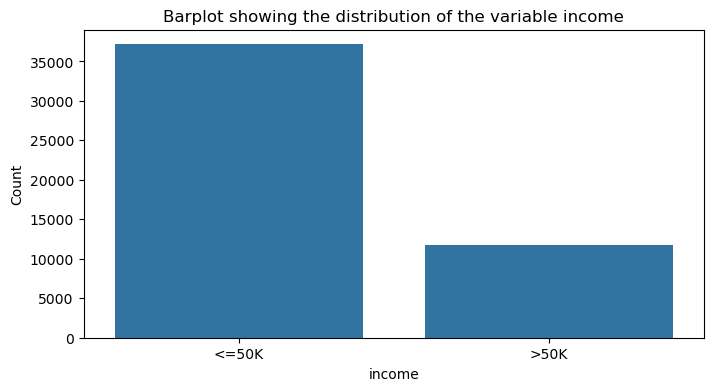

In [76]:
plt.figure(figsize=(8, 4))
sns.countplot(x = "income", data = adult_data)
plt.title("Barplot showing the distribution of the variable income")
plt.xlabel("income")
plt.ylabel("Count")
plt.show()

In [77]:
adult_data["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [78]:
adult_data["income"].value_counts(normalize=True)

income
<=50K    0.760718
>50K     0.239282
Name: proportion, dtype: float64

## Variation and correlation between pairs of variables: 


##### Age and hours pr. week (2 numerics)

As seen in the scatterplot, the hours-per-week doesn't seem to vary that much as age increases. There is a high consentration around 40 houurs pr. week, across the ages.

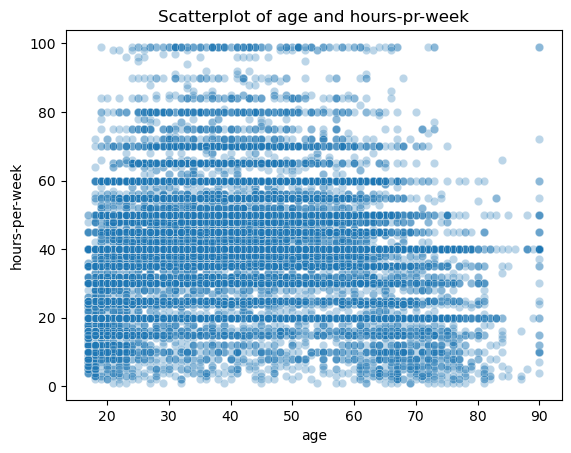

In [79]:
sns.scatterplot(data = adult_data, x = "age", y = "hours-per-week", alpha=0.3)
plt.title("Scatterplot of age and hours-pr-week")
plt.show()

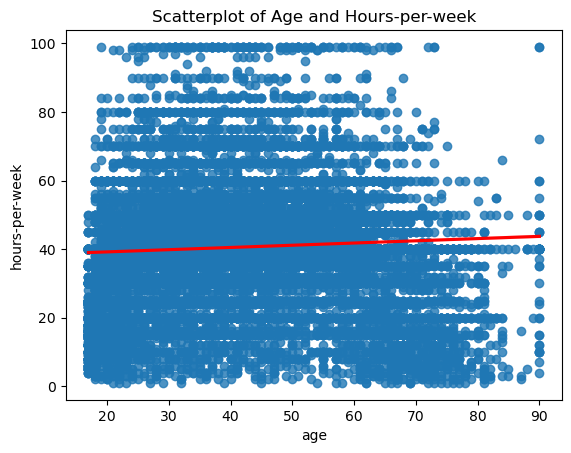

In [80]:
sns.regplot(x = "age", y = "hours-per-week", data = adult_data, line_kws={"color": "red"})
plt.title("Scatterplot of Age and Hours-per-week")
plt.show()

The above plotting with a regression line, shows that there is a slight (but almost insignificant) positive correlation between hours-pr-week and age.

In [81]:
adult_data["age"].corr(adult_data["hours-per-week"])

np.float64(0.07155833852698382)

Calculating the correlation shows a small positive correlation of 0.076. This indicates a really weak correlation


##### Sex and hours pr. week (1 categorical and 1 numerical)

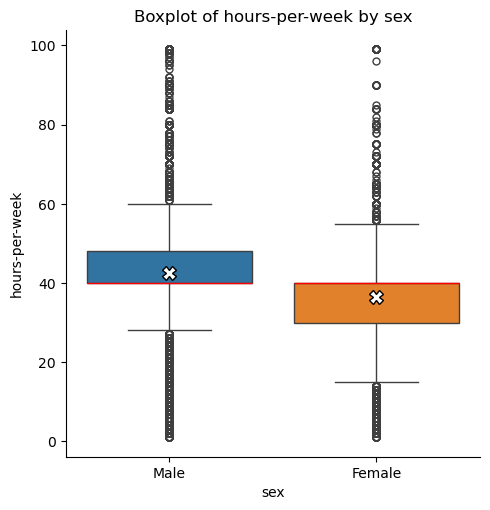

In [82]:
sns.catplot(x="sex", y = "hours-per-week", hue = "sex", data = adult_data, kind="box",
            showmeans=True,
            medianprops={"color": "red"},
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Boxplot of hours-per-week by sex")
plt.show()

As seen in the boxplot, it appears that the median hours-per-week for Males and Females are almost identical. The mean is slighty different between the 2 sexes. The IQR for males are more narrow indicating that the middle 50% of male data is more centered around  the median. Where as with females, there is more spread in the middle 50% of female data. 

We also see that there are more outliers for males than females, indicating that there are more "extreme" values for hours-per-week for men. 

In [83]:
hours_per_week_by_sex = adult_data["hours-per-week"].groupby(adult_data["sex"]).describe()
hours_per_week_by_sex

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,16192.0,36.400692,11.948866,1.0,30.0,40.0,40.0,99.0
Male,32650.0,42.416845,12.120042,1.0,40.0,40.0,48.0,99.0


Here we see that the mean of Males are higher, than for females.
Men and women have the same median working hours (40), but men are more likely to work significantly longer hours, as seen by the mean and larger range (from Q1 to Q3).

##### Marital status and sex (2 categorical)

In [91]:
marital_status_by_sex = pd.crosstab(adult_data["marital-status"], adult_data["sex"])

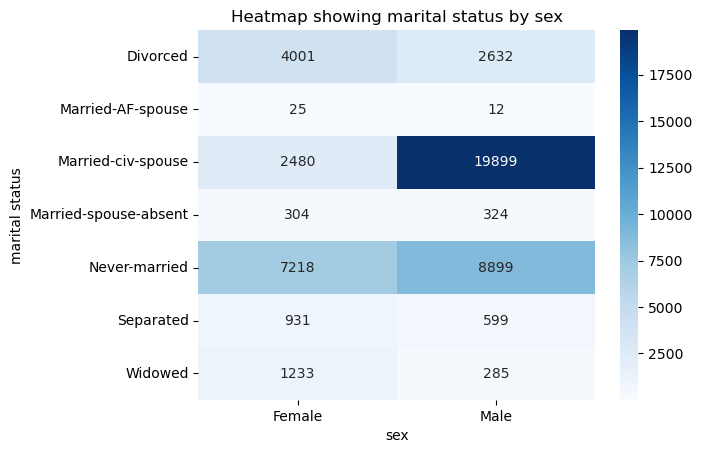

In [90]:
sns.heatmap(marital_status_by_sex, annot=True, fmt="d", cmap="Blues")

plt.title("Heatmap showing marital status by sex")
plt.xlabel("sex")
plt.ylabel("marital status")

plt.show()


We see a higher consentration of men being married-civ-spouse or never married, where as for women there is a higher spread across the different categories.

In [93]:
pd.crosstab(adult_data["sex"], adult_data["marital-status"])

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
sex,,,,,,,
Female,4001,25,2480,304,7218,931,1233
Male,2632,12,19899,324,8899,599,285


<Axes: xlabel='sex'>

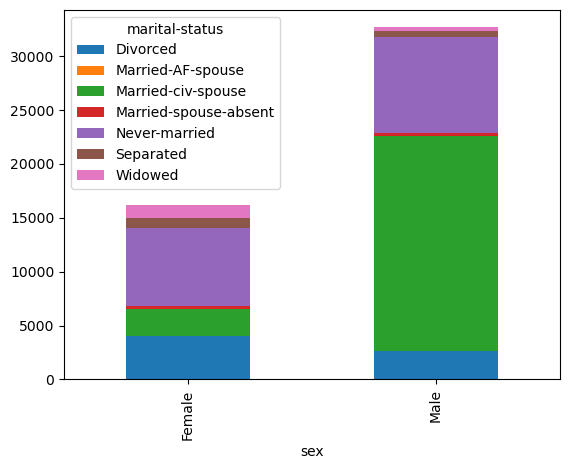

In [92]:
pd.crosstab(adult_data["sex"], adult_data["marital-status"]).plot(kind="bar", stacked=True)

We see that the Married-civ-spouse is dominated by men, whereas fewer females fall into this category. The proportion of men and females that are never married, is almost identical. There is a bigger proportion of females that are Widowed and that is also the case for Divorce

## Exercise 4

Complete an exploratory data analysis of the titanic dataset (it is on moodle). (Remember, you can load it in as `titanic_data = pd.read_csv("titanic_survival_data.csv")`)

In [ ]:
titanic_data = pd.read_csv("titanic_survival_data.csv")
titanic_data.head()

In [ ]:
titanic_data.shape #showing num of col and rows

In [ ]:
titanic_data.info()

In [ ]:
titanic_data.describe()

In [ ]:
titanic_data.isnull().sum()

In [ ]:
titanic_data[titanic_data["Age"].isna()]

###### Picks random ages and insert those val in the NaN fields. Using seed, to verify reproducability

In [ ]:
fake_ages = titanic_data['Age'].dropna().sample(titanic_data['Age'].isnull().sum(), random_state=1337)
fake_ages

In [ ]:
titanic_data.loc[titanic_data["Age"].isnull(), "Age"] = fake_ages
fake_ages

## Exercise 5

Do an exploratory data analysis of the diabetes dataset. The cell below loads the dataset from the scikit learn package into the pandas dataframe called `diabetes_data`.

In [ ]:
from sklearn.datasets import load_diabetes
d_data = load_diabetes(as_frame=True)
diabetes_data = d_data.data
diabetes_data["Target"] = d_data.target

diabetes_data